## Исследование данных о российском кинопрокате



**Заказчик этого исследования** — Министерство культуры Российской Федерации. 

Необходимо: 
- изучить рынок российского кинопроката
- выявить текущие тренды
- уделить внимание фильмам, которые получили государственную поддержку
- ответить на вопрос, насколько такие фильмы интересны зрителю 

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

Открываем первый датасет.

In [2]:
try:
    df = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

Проверим запуск.

In [3]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Открываем второй датасет.

In [4]:
try:
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

Проверим запуск.

In [5]:
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Посмотрим основную информацию об обоих датасетах.

In [6]:
df_shows.info()
print()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 

Объединять два датасета по столбцу 'puNumber'. Из полученной информации мы видим что в двух датасетах разный тип данных у этого столбца. Для начала нужно привести в соответсвие и преобразовать строки в целые числа в df_mkrf_movies.

Для просмотра выпадающих не цифровых значений, напишем функцию, которая найдет такие записи.

In [7]:
df[~df['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


При обработке выпало два значения. Первое в  строке 804 видимо есть  не нужные пробелы. Для их удаления удобно использовать строковый метод .strip(). И второе в строке 1797 явный пропуск. Удалять не будем ,тем более, что датасет небольшой, поэтому просто заменим нулем. Затем приведем строки к целым числам функцией to_numeric() и выведем результат изменения типа на цисловой.

In [8]:
df.loc[804, 'puNumber'] = df.loc[804, 'puNumber'].strip()
df.loc[1797, 'puNumber'] = '0'

df['puNumber'] = pd.to_numeric(df['puNumber'])
df['puNumber'].dtype

dtype('int64')

Теперь тип данных в обоих датафреймах совпадает, мы можем объединять два датасета.

In [9]:
df = df.merge(df_shows, how='left')
del df_shows

Проверим результат объединения.

In [10]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


**Вывод:** Импортировав необходимые библиотеки мы успешно прочитали два датасета. Далее разобрались и привели к единому типу данных колонки по которой мы будем объединять два датасета. Успешно объединили. Далее приступаем к предобработке данных.

Проверим, что при соединении мы ничего не потеряли. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Отлично, 7486 строк на месте.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [14]:
df.rename(columns = {'title':'name', 'puNumber': 'license','show_start_date': 'date_start',\
                     'type':'type', 'film_studio': 'film_studio',\
                     'director':'director', 'producer':'producer',\
                     'production_country':'country','refundable_support':'refundable_support',\
                     'nonrefundable_support':'nonrefundable_support',\
                     'budget':'budget', 'financing_source':'financing_source',\
                     'ratings':'ratings', 'genres':'genres', 'box_office':'box_office',\
                    'age_restriction': 'age' }, inplace = True )

In [15]:
df.head()

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [16]:
df.sample(5)

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
41,Алекс и Эмма,221004616,2016-02-09T12:00:00.000Z,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",NaN
2996,Алиса в Зазеркалье (2016),121010916,2016-04-29T12:00:00.000Z,Художественный,"Уолт Дисней Пикчерз, Рот Филмз, Тим Тодд, Тим ...",США,Джеймс Бобин,"Тим Бертон, Джо Рот, Дженнифер Тодд, Сюзанн Тодд",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,приключения,семейный",603191180.4
993,Братва из джунглей,124001213,2013-04-11T12:00:00.000Z,Анимационный,Крайон Пикчерз,США - Индия,Никхил Адвани,"Адитья Нат Джха, Анупама Патил, Кишор Патил",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.0,"мультфильм,комедия,приключения",22720.0
6092,Последний Шанс,113000318,2018-08-14T12:00:00.000Z,Научно-популярный,Шаглеева Соньн Константиновна,Россия,С.Шаглеева,С.Шаглеева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.6,боевик,NaN
1512,Волк с Уолл-стрит,121000614,2014-01-23T12:00:00.000Z,Художественный,"Аппиан Вэй, ИМДЖАГ Продакшнс, Ред Грэнайт Пикч...",США,Мартин Скорсезе,"Риза Азиз, Леонардо ДиКаприо, Джой МакФарлэнд,...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.9,"драма,криминал,биография",NaN


Исходя из сводной информации нас интересуют две колонки. Это date_start - необходимо перевести тип данных в datetime. И ratings - здесь необходимо перевести в тип данных int.

***ratings***

Посмотри на уникальные значения в колонке ratings.

In [17]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Посмотрим что это за значения, исключая пропуски. 

In [18]:
wrong_raitings = df[df['ratings'].str.contains('[^0-9.]').fillna(False)]
wrong_raitings

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29T12:00:00.000Z,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06T12:00:00.000Z,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29T12:00:00.000Z,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15T12:00:00.000Z,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30T12:00:00.000Z,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1874,Короткие истории о любви 2,121002615,2015-02-13T12:00:00.000Z,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27T12:00:00.000Z,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2126,Поездка к матери,111002015,2015-03-02T12:00:00.000Z,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2146,Главный,111003415,2015-03-27T12:00:00.000Z,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2438,Самый рыжий Лис,111012715,2015-07-30T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


Часть данных хранится в формате процентов, хотя обычно для рейтингов используют десятибальную систему. Перепишем проценты в этих строках как доли от 10 баллов, а затем приведём всё к числу. Убедимся, что предельные значения находятся в диапазоне 1..10.

In [19]:
df.loc[wrong_raitings.index, 'ratings'] = wrong_raitings['ratings'].str[0] + '.' + wrong_raitings['ratings'].str[1]
df['ratings'] = pd.to_numeric(df['ratings'])
df['ratings'].describe()[['min', 'max']]

min    1.0
max    9.9
Name: ratings, dtype: float64

***date_start***

Даты премьера фильма хранятся в строчном формате. Переведем в datetime.

In [20]:
df['date_start'] = pd.to_datetime(df['date_start'], format='%Y-%m-%dT%H:%M:%S')
df['date_start'].dtype

datetime64[ns, UTC]

**Вывод:** Проверив все типы данных мы определили неправильные всего лишь в двух колонках. Успешно их преобразовали в необходимый нам тип данных. Далее будем разбираться с пропущенными значениями.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [21]:
df.isnull().sum().sort_values()

name                        0
license                     0
date_start                  0
type                        0
age                         0
country                     2
director                    9
film_studio                18
producer                  568
ratings                   967
genres                    976
box_office               4328
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
dtype: int64

In [22]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Количество пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

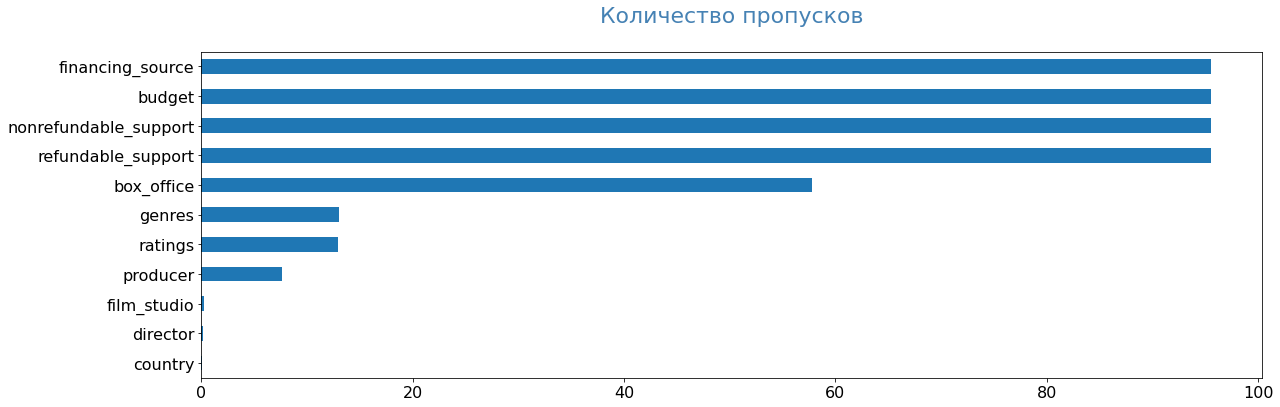

In [23]:
pass_value_barh(df)

Исходя их графика видно, что пропуски в колонках refundable_support, nonrefundable_support, budget, financing_source одинаковые и составляют 7154 пропуска. Учитывая, что данные говорят, в том числе об объёме государственной поддержки, то скорее всего факт пропуска связан со страной. По другим колонкам попробуем заполнить.

***country***

Проверим пропуски в колонке country.

In [24]:
df[df['country'].isnull()].head()

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Как мы можем видеть два пропуска и в обоих произведения сделанные в России, соответсвенно заменим эти пропуски на Россия.

In [25]:
df['country'] = df['country'].fillna('Россия')

Проверим.

In [26]:
df['country'].isnull().sum()

0

Отлично работаем дальше.

***director***

Проверим пропуски в колонке director.

In [27]:
df[df['director'].isnull()].head(9)

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


Я таких картин не знаю. Гугл не помогает. Заполним пропуски графой 'неизвестно'.

In [28]:
df['director'] = df['director'].fillna('Неизвестно')

Проверим.

In [29]:
df['director'].isnull().sum()

0

***film_studio***

Проверим пропуски в колонке film_studio.

In [30]:
df[df['film_studio'].isnull()].head(18)

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,Неизвестно,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Аналогично заполним пропуски графой 'неизвестно'. Я думаю это нам не помешает. Значений слишком мало.

In [31]:
df['film_studio'] = df['film_studio'].fillna('Неизвестно')

Проверим.

In [32]:
df['film_studio'].isnull().sum()

0

***producer***

Проверим пропуски в колонке producer.

In [33]:
df[df['producer'].isnull()].head()

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


Много пропусков связано со страной СССР. Предполагаю, что в советском союзе не было такого понимания как продюсер фильма. И зачастую роль продюсера выполнял директор картины (фильма). Посмотрим сколько таких значений по фильтру СССР с пропусками.

In [34]:
df.query('country == "СССР"')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
15,Председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


347 пропусков. Теперь заменим значения producer на значения director в пропусках с фильмами из СССР. Тем самым мы избавимся от пропусков)

In [35]:
df['producer'] = df['producer'].where(df['country'] != "СССР" , other = df['director'])

Проверим.

In [36]:
df.query('country == "СССР"')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,В.Абдрашитов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,В.Меньшов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,М.Туманишвили,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
15,Председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,А.Салтыков,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,Г.Кузнецов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,Я.Лапшин,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,Я.Лапшин,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,О.Николаевский,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


С остальными пропусками решено заменить их на неизвестно.

In [37]:
df['producer'] = df['producer']. fillna('Неизвестно')

Проверим.

In [38]:
df['producer'].isnull().sum()

0

Отлично, идем дальше.

***ratings***

Проверим пропуски в колонке ratings

In [39]:
df[df['ratings'].isnull()].head(10)

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов","А.Столпер, Б.Иванов",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Б.Барнет,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Разбойник и принцесса /По мотивам сказок Карел...,224010714,2014-08-28 12:00:00+00:00,Художественный,Чешское телевидение,Чехия,Карел Смычек,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,Пьетро Масканьи. Сельская честь /По одноименно...,126001812,2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Опера на льду,126001712,2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,Артур Сеймур Салливан. Микадо. Постановка Sydn...,126000212,2012-01-27 12:00:00+00:00,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Попробуем заменить пропуски на нули.

In [40]:
df['ratings'] = df['ratings'].fillna(0)

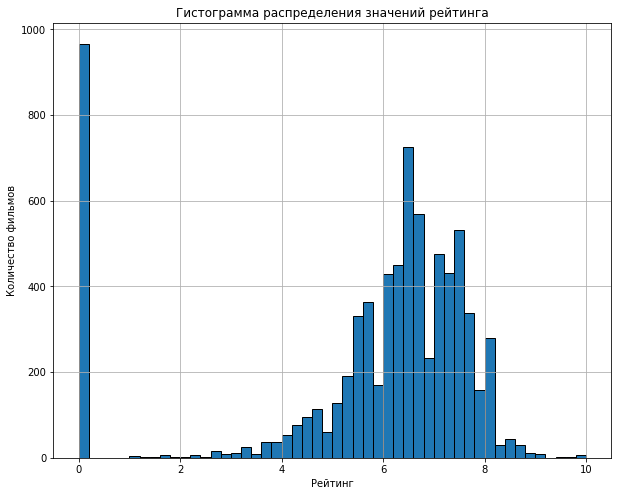

In [41]:
plt.figure(figsize=(10,8))
df['ratings'].hist(bins=50, range=(0,10), ec='black')
plt.title('Гистограмма распределения значений рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

In [42]:
df['ratings'].isnull().sum()

0

***genres***

Проверим пропуски в колонке genres

In [43]:
df[df['genres'].isnull()].head(10)

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов","А.Столпер, Б.Иванов",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Б.Барнет,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,NaN,NaN
264,Разбойник и принцесса /По мотивам сказок Карел...,224010714,2014-08-28 12:00:00+00:00,Художественный,Чешское телевидение,Чехия,Карел Смычек,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,NaN,NaN
411,Пьетро Масканьи. Сельская честь /По одноименно...,126001812,2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,NaN,NaN
412,Опера на льду,126001712,2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,NaN,NaN
443,Артур Сеймур Салливан. Микадо. Постановка Sydn...,126000212,2012-01-27 12:00:00+00:00,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,NaN,NaN


С жанрами мне не понятно, как можно определить жанр по названию к примеру. Заменим пропуски на значение "не указан"

In [44]:
df['genres'] = df['genres']. fillna('Не указан')

Проверим.

In [45]:
df['genres'].isnull().sum()

0

Отлично.

In [46]:
df.isnull().sum().sort_values()

name                        0
license                     0
date_start                  0
type                        0
film_studio                 0
country                     0
director                    0
producer                    0
age                         0
ratings                     0
genres                      0
box_office               4328
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
dtype: int64

***box_office***

Проверим пропуски в колонке box_office

In [47]:
df[df['box_office'].isnull()].head(10)

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,В.Абдрашитов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,Неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
10,Превосходство Борна /По одноименной новелле Ро...,221031416,2016-06-29 12:00:00+00:00,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"боевик,триллер,детектив",NaN


Посмотрим на статистические данные.

In [48]:
df['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

Среднее значение по сборам составляет 76 478 700, медианное значение 2 327 988. Я пока не понимаю как можно заменить здесь пропуски.

Пропуски в refundable_support, nonrefundable_support, budget, financing_source обоснованы только страной Россия, которая обеспечивает государственную поддержку. То есть той малой частью из общего списка всех фильмов. 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим датасет на наличие дубликатов.

In [49]:
df.duplicated().sum()

0

Проверим колонку name на наличие дубликатов.

In [50]:
df['name'].duplicated().sum()

714

Создадим отедьный список с дубликатами, применив условие.

In [51]:
duplicated_names = df[df['name'].duplicated() == True]['name']

Проверим, что получилось.

In [52]:
duplicated_names

3                                            Особо опасен
4                                            Особо опасен
41                                           Алекс и Эмма
110     Гарри Поттер и орден Феникса /По роману Дж.К.Р...
113     Гарри Поттер и узник Азкабана /По роману Дж.К....
                              ...                        
7369                                            Невиновен
7416                               Отель "Гранд Будапешт"
7438                                                Зверь
7450                                        В тихом омуте
7474                                            Вторжение
Name: name, Length: 714, dtype: object

Создадим список с дубликатами, применив условие, которое делает все значения строчными буквами и убирает лишние пробелы.

In [53]:
duplicated_names_lower = df[df['name'].str.strip().str.lower().duplicated() == True]['name'].str.strip().str.lower()

Проверим результат обработки.

In [54]:
duplicated_names_lower

3                                            особо опасен
4                                            особо опасен
41                                           алекс и эмма
110     гарри поттер и орден феникса /по роману дж.к.р...
113     гарри поттер и узник азкабана /по роману дж.к....
                              ...                        
7369                                            невиновен
7416                               отель "гранд будапешт"
7438                                                зверь
7450                                        в тихом омуте
7474                                            вторжение
Name: name, Length: 724, dtype: object

In [55]:
df.duplicated().sum()

0

Проверим на примере фильма Особо опасен возможность дублирования.

In [56]:
df.query('name == "Особо опасен"')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Здесь у нас видно, что название одно, а номер прокатного удостоверения разный. Это следует учитывать. Бывает такое что один и тот же фильм пускали в прокат несколько раз.

Проверим на неявные дубли по занчению названия фильма.

In [57]:
df.loc[df['name'].duplicated(keep=False)].sort_values(by='name').tail()

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,Неизвестно,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,Не указан,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,Неизвестно,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,Не указан,NaN


Проверим неявные дубликаты по колонке lecense. Так номер прокатного удоствоерения это уникальный номер для каждого фильма и не может быть двух разных фильмов под одним номером лицензии.

In [58]:
df.loc[df['license'].duplicated(keep=False)]

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Просто напросто избавимся от таких дубликатов. У которых одинаковые номера лицензии.

In [59]:
df =  df.drop_duplicates(subset=['license'])

Проверим сработал ли метод.

In [60]:
df.loc[df['license'].duplicated(keep=False)]

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Сработал. Этот метод который был изначально показывал наш наставник на вебинаре. Оказывается есть тонкости. Я понял одно, каждое действие необходимо перепроверять.

**Вывод:** Предобработка очень важна для дальнейшего исследования, так как любые погрешности и ошибки будут очень сильно влиять на результат в целом. На этом этапе мы проработали почти все пропуски, которые мы смогли исправить. Поправили типы данных. Проверили на явные и неявные дубликаты. Избавились от повтороной информации. И следуем дальше.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Проработаем колонку country на наличие лишних пробелов, запятых и тире.

In [61]:
df['country'] = df['country'].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split('-')]))
df['country'].tail()

7481             Великобритания
7482                        США
7483                США, Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: country, dtype: object

Применим это же правило по отношению к колонкам 'director', 'producer', 'film_studio', 'country', 'genres'

In [62]:
for column in ['director', 'producer', 'film_studio', 'country', 'genres']:
    
    print('уникальные значения в', column)
    print('   было', df[column].nunique())
    
    df[column] = df[column].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split(',')]))
    
    print('  стало', df[column].nunique())
    print()

уникальные значения в director
   было 4811
  стало 4800

уникальные значения в producer
   было 5542
  стало 5526

уникальные значения в film_studio
   было 5490
  стало 5461

уникальные значения в country
   было 813
  стало 812

уникальные значения в genres
   было 743
  стало 743



Что-то да и удалилось. Идем дальше.

Посмотрим на уникальные значения в колонке type.

In [63]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Для начала удалим лишние пробелы в названиях. И заодно проверим.

In [64]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Видно, что теперь художественный тип один. 

Далее посмотрим на уникальные значения в колонке age.

In [65]:
df['age'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Здесь проблем нет, всё отлично. Идем дальше.

Посмотрим на уникальные значения в колонке financing_source.

In [66]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Посмотрим на уникальные значения в колонке genres.

In [67]:
df['genres'].unique()

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия',
       'мюзикл, мелодрама, комедия', 'комедия, криминал',
       'боевик, триллер, детектив', 'боевик, драма, приключения',
       'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама',
       'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, мелодрама, криминал',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'ужасы, фантастика, комедия',
       'мультфильм, короткометражка, мелодрама', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'триллер, драма, криминал',
       'драма, мелодрама, биография', 'драма, комедия, военный',
       'фантастика, драма, детектив', 'мюзикл, семейный', 'Не указан',
       'военный, приключения, драма', 'документальный, драма',
       'драма, биография, история', 'боевик, триллер, драма',
       'фэнтези, боевик', 'боевик, ком

**Вывод:** Почти во всех колонках встречались такие проблемы как лишние пробелы, запятые и тире. В одних и тех же значениях. Привели в соответствие и к единому виду. Чтобы в дальнейшем не было проблем. Вот поэтому каждый этап предобработки очень важен. Ошибки встречаются в малом, даже в лишнем пробеле. Идем дальше.

Зачастую при копировании текста или переносе таблиц возникают проблемы с наличием лишних символов, которые могут появиться по самым разным причинам: 

- неправильный ввод данных, 
- импортирование данных из внешних источников и т.д.

Помимо того, что данные могут стать трудночитаемыми. Так и использование обычных инструментов (к примеру, сортировка, фильтрация, поиск, применение функций и т.д.) становится затруднительным и некорректным.

Наличие лишних пробелов и различное написание одних и тех же значений могут привести к разным проблемам, особенно в контексте обработки текста и поиска информации.
- Во-первых, это может затруднять поиск информации, так как различное написание слов может приводить к тому, что запрос не будет полностью соответствовать искомому значению, а наличие лишних пробелов может приводить к тому, что слово не будет найдено вообще.
- Во-вторых, это может затруднять обработку текста, так как компьютерные программы для обработки текста могут рассматривать слова с различным написанием как разные слова, что приведет к ошибкам при анализе и обработке текста.Кроме того, в некоторых случаях это может привести к неправильному толкованию текста или даже к изменению смысла текста. 

Поэтому важно следить за правильным написанием слов и использованием пробелов в тексте, чтобы обеспечить точность и правильность обработки текста и поиска информации.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Проверим колонку бюджет. Построив гистограмму.

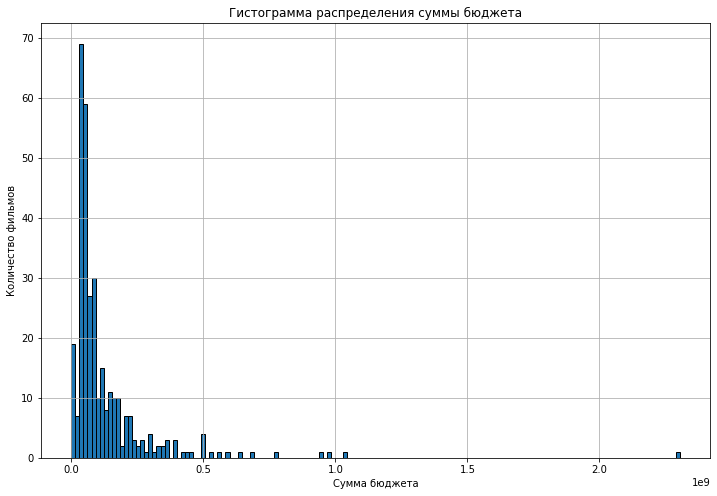

In [68]:
plt.figure(figsize=(12,8))
df['budget'].hist(bins=150, ec='black')
plt.title('Гистограмма распределения суммы бюджета')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма бюджета')
plt.show()

Посмотрим на участок от 1 млрд.

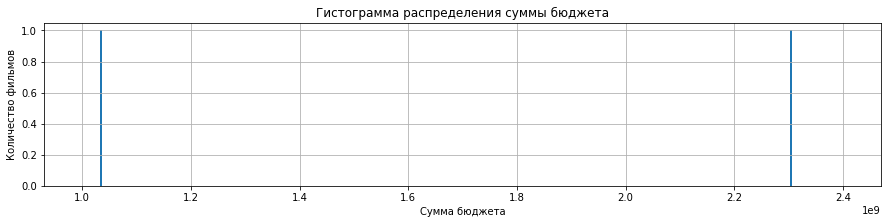

In [69]:
df.budget.hist(bins = 300, figsize = (15,3), range = (1000000000, 2400000000));
plt.title('Гистограмма распределения суммы бюджета')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма бюджета')
plt.show()

Посмотрев на гистограмму видно огромные бюджеты, которые больше 1 млрд. Далее мы увидим эти фильмы с таким бюджетом. Тут все в порядке.

Посмотрим на фильмы с бюджетом менее 100 млн.

In [70]:
df.query('budget < 100000000')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма, мелодрама",365353.60
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,0.0,Не указан,28140.00
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.50
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.00
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм, фэнтези, история",15078858.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,Новогодний ремонт,111018219,2019-11-07 12:00:00+00:00,Художественный,"ООО ""ВитЭл""",Россия,А.Пинхасов,"Е.Михайлова, В.Галыгин, В.Колесник, А.Седых, Г...",«12+» - для детей старше 12 лет,0.0,20000000.0,30448911.0,Министерство культуры,5.6,"комедия, мелодрама",3591456.36
7322,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.0,20000000.0,75000000.0,Фонд кино,7.8,драма,3181218.00
7344,Кроличья лапа,111018919,2019-11-20 12:00:00+00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0.0,30000000.0,47734050.0,Министерство культуры,0.0,Не указан,NaN
7375,Тварь,111019419,2019-11-26 12:00:00+00:00,Художественный,"ООО ""СОК""",Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Т...",«16+» - для детей старше 16 лет,5000000.0,35000000.0,78422212.0,Фонд кино,5.0,"триллер, драма",18617156.96


Посмотрим на фильмы с бюджетом более 800 млн.

In [71]:
df.query('budget > 800000000')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5437,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,"фэнтези, комедия, семейный",5.117755e+08
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"приключения, фэнтези",3.335971e+08
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.800000e+08,Фонд кино,6.0,"история, биография, драма",7.177032e+08
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.440000e+08,Фонд кино,5.7,"фантастика, боевик",NaN


Посмотрим на статистичексие данные.

In [72]:
df['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

Из них видно что максимальный бюджет это 2.3 млрд, среднее значения бюджета составляет 127 млн.

Создадим список, в который отберем те строки, в которых сумма бюджета меньше чем сумма возвартных и не возвартных значений.

In [73]:
wrong_budget = df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]
wrong_budget

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик, драма, криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия, фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм, приключения, фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия, драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия, мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия, мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


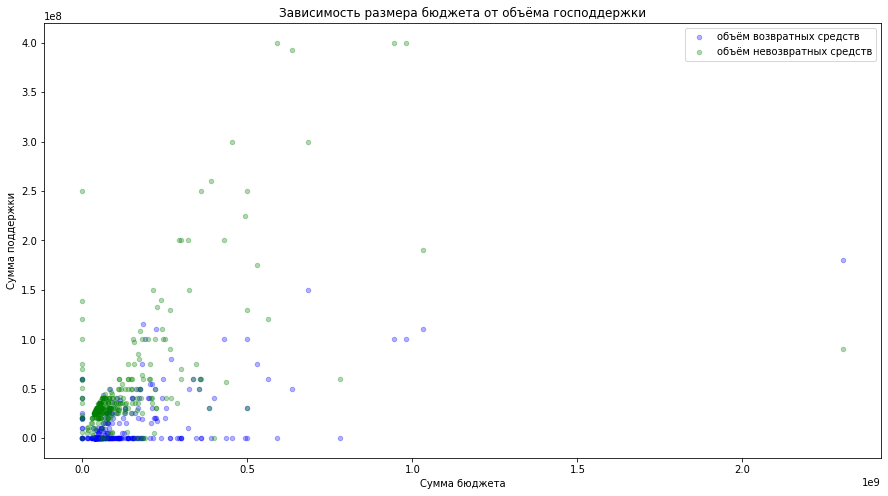

In [74]:
ax = df.plot.scatter(
    title='Зависимость размера бюджета от объёма господдержки',
    label='объём возвратных средств',
    figsize=(15,8),
    x='budget',
    y='refundable_support',
    color='blue',
    alpha=0.3
)

df.plot.scatter(
    label='объём невозвратных средств',
    x='budget', 
    y='nonrefundable_support',
    figsize=(15,8),
    color='green',
    alpha=0.3,
    ax=ax)
plt.ylabel('Сумма поддержки')
plt.xlabel('Сумма бюджета')
plt.show();

df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

support_percentage = df['support_percentage'].median()

Есть ряд фильмов, которые получали господдержку, но в бюджете стоит 0. Выясним в каком объёме обычно оказывалась поддержка и заменим средним процентом от поддержки. Суммируем оба вида господдержки.

Вывод по бюджету по значениям вроде все хорошо. Нулевые значения тоже поправили. Следуем дальше.

In [75]:
df.loc[wrong_budget.index, 'budget'] = (df.loc[wrong_budget.index, 'refundable_support']\
                                     + df.loc[wrong_budget.index, 'nonrefundable_support']) / support_percentage

df.loc[wrong_budget.index]

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,3.745699e+07,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,1.221424e+08,Фонд кино,6.6,драма,4.461635e+08,inf
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,1.302852e+08,Фонд кино,7.8,"боевик, драма, криминал",1.965724e+08,inf
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,3.257129e+07,Фонд кино,6.2,"комедия, фэнтези",6.741897e+07,inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,2.605704e+08,Фонд кино,4.6,"мультфильм, приключения, фэнтези",1.844876e+08,inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,9.608532e+07,Фонд кино,6.3,"комедия, драма",1.957739e+06,inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,5.699976e+07,Фонд кино,5.1,"комедия, мелодрама",7.293778e+07,inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,9.771388e+06,Министерство культуры,4.3,комедия,1.536293e+07,inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,1.139995e+08,Фонд кино,6.3,"комедия, мелодрама",7.029905e+07,inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,4.071412e+08,Фонд кино,5.6,фантастика,1.038321e+09,inf


Проверим колонку бюджет. Построив гистограмму.

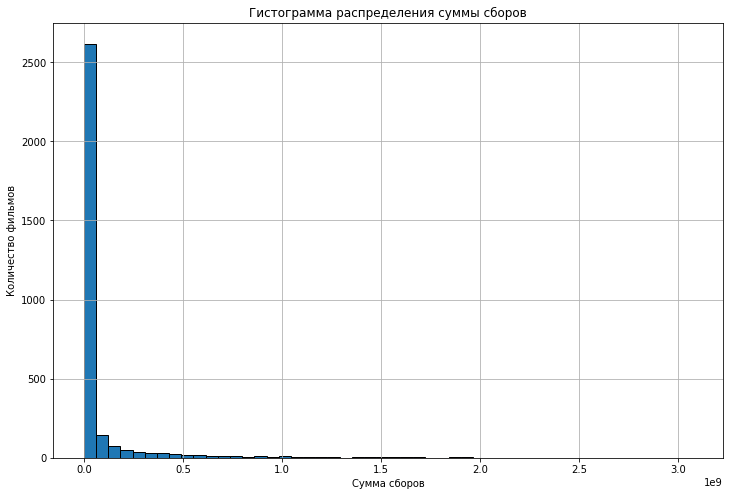

In [76]:
plt.figure(figsize=(12,8))
df['box_office'].hist(bins=50, ec='black')
plt.title('Гистограмма распределения суммы сборов')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма сборов')
plt.show()

Уменьшим масштаб.

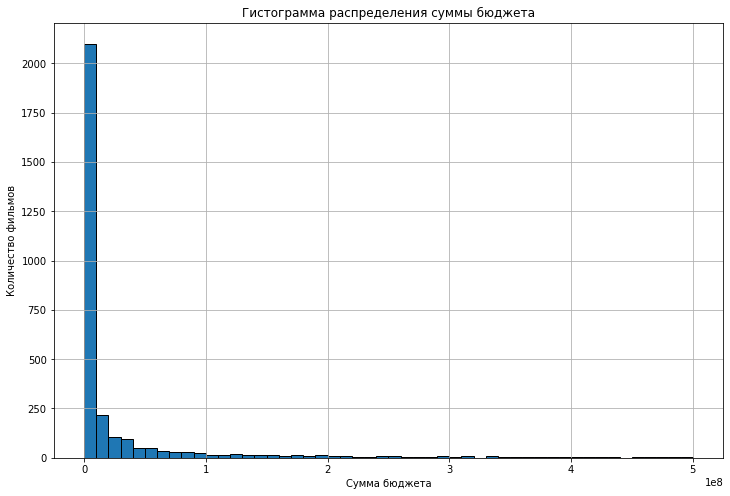

In [77]:
plt.figure(figsize=(12,8))
df['box_office'].hist(bins=50,range = (0,500000000), ec='black')
plt.title('Гистограмма распределения суммы бюджета')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма бюджета')
plt.show()

Еще уменьшим.

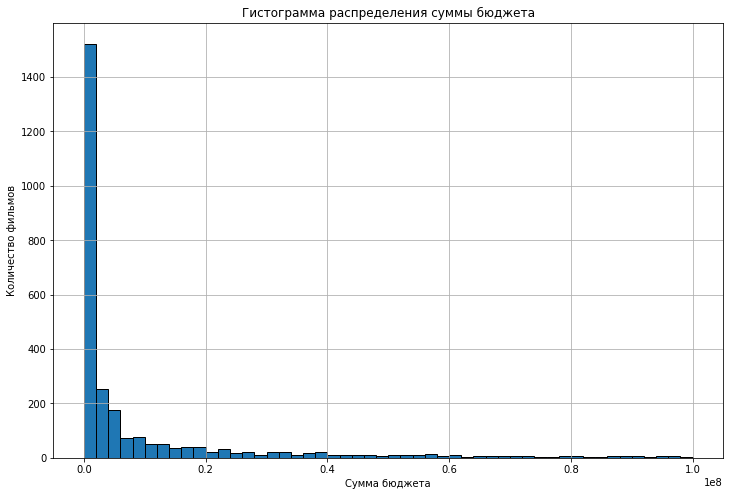

In [78]:
plt.figure(figsize=(12,8))
df['box_office'].hist(bins=50,range = (0,100000000), ec='black')
plt.title('Гистограмма распределения суммы бюджета')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма бюджета')
plt.show()

Посмотрим до 50 млн.

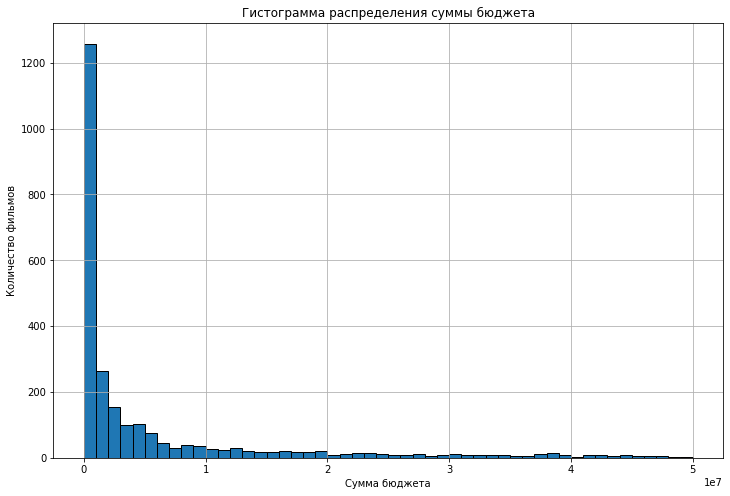

In [79]:
plt.figure(figsize=(12,8))
df['box_office'].hist(bins=50,range = (0,50000000), ec='black')
plt.title('Гистограмма распределения суммы бюджета')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма бюджета')
plt.show()

Отфильтруем по значению 0.

In [80]:
df.query('box_office == 0')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,Неизвестно,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,"драма, биография, музыка",0.0,NaN
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,Н.Губенко,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,драма,0.0,NaN
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,комедия,0.0,NaN
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...","Германия, Нидерланды, Беларусь, Россия, Латвия",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.5,"драма, военный, история",0.0,NaN
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.4,"аниме, мультфильм, драма",0.0,NaN
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.7,"аниме, мультфильм, фантастика",0.0,NaN
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,биография,0.0,NaN
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"комедия, мелодрама",0.0,NaN
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"мелодрама, комедия, драма",0.0,NaN
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...","Германия, Бельгия, США, Франция",Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,драма,0.0,NaN


Выделяется много фильмов у которых сумма сборов равна 0. Значит таких данных нет.

Посмотрим на значения больше 2.4 млрд.

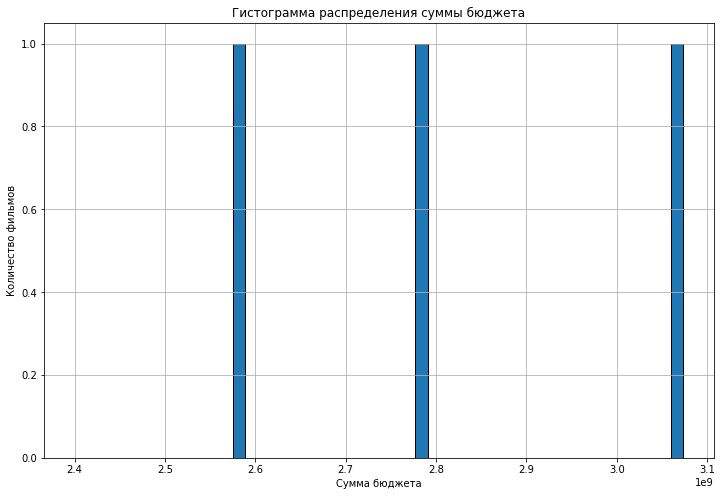

In [81]:
plt.figure(figsize=(12,8))
df['box_office'].hist(bins=50,range = (2400000000,3073569000), ec='black')
plt.title('Гистограмма распределения суммы бюджета')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма бюджета')
plt.show()

Посмотрим на статистические данные.

In [82]:
df['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

Выведем фильмы с суммой сборов более 2 млрд.

In [83]:
df.query('box_office > 2000000000 ')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2859,Зверополис,124000316,2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.3,"мультфильм, комедия, криминал",2.048126e+09,NaN
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези, боевик, комедия",2.118396e+09,NaN
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт, драма",2.779686e+09,0.677745
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,563784717.0,Фонд кино,6.5,"драма, военный, боевик",2.271754e+09,0.319271
6820,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика, боевик, драма",2.576614e+09,NaN
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,0.375000


Фильмы с суммой сборов больше 2 млрд есть и они выделяются на гистограмме. Все верно.

**Вывод:** По аномальным значения в колонке box_office понятно. Много нулей, значит данных о сборах нет. А аномально большие суммы соответсвуют фильмам которые выстрелили и собрали больше всего денег.

Проверим колонку rating.

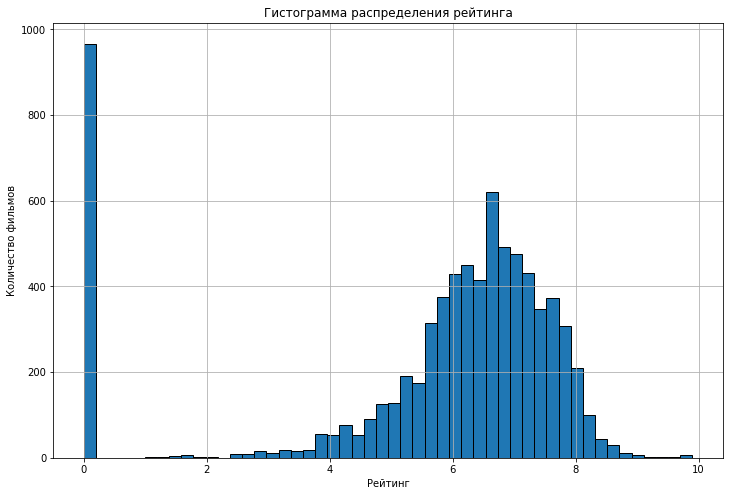

In [84]:
plt.figure(figsize=(12,8))
df['ratings'].hist(bins=50, ec='black')
plt.title('Гистограмма распределения рейтинга')
plt.ylabel('Количество фильмов')
plt.xlabel('Рейтинг')
plt.show()

Посмотрим на значения с рейтингом от 1 до 2.

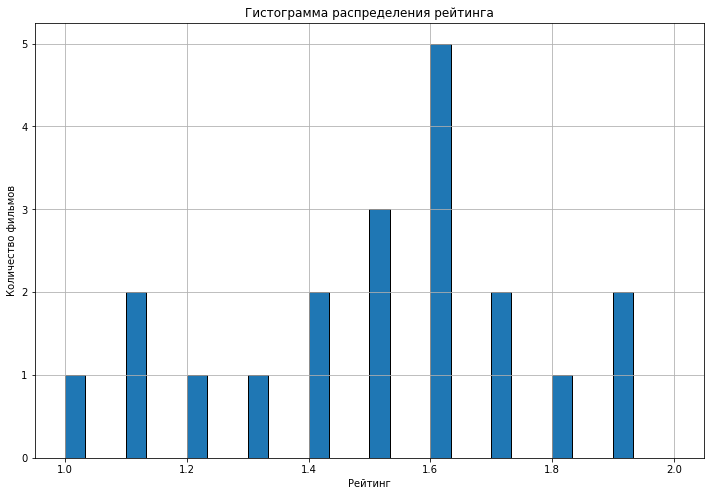

In [85]:
plt.figure(figsize=(12,8))
df['ratings'].hist(bins=30,range = (1,2), ec='black')
plt.title('Гистограмма распределения рейтинга')
plt.ylabel('Количество фильмов')
plt.xlabel('Рейтинг')
plt.show()

Рейтинг от 1 до 2 выглядит нормальным. Такие фильмы наверное реально присутствуют. 

Посмотрим на них.

In [86]:
df.query('ratings<2 and ratings >1')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
515,Ночь в супермаркете,124001212,2012-05-02 12:00:00+00:00,Анимационный,"Си 47 Продакшнз, Лайнс Гейт Фэмили Интертейнме...",США,Лоуренс Казанофф,"Джордж Джонсен, Лоуренс Казанофф, Элисон Сэвич...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,1.6,"мультфильм, комедия, семейный",620.00,NaN
1025,Большая Ржака,111003512,2012-07-23 12:00:00+00:00,Художественный,"ООО ""Авеста филмс""",Россия,В.Москаленко,"Р.Арзуманов, В.Малый",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.4,комедия,87795.00,NaN
1226,Зомби каникулы,111001213,2013-03-29 12:00:00+00:00,Художественный,"ООО Студия ""Новая волна""",Россия,К.Кемниц,С.Торчилин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,1.5,"ужасы, триллер, комедия",NaN,NaN
1468,Черная роза,111004014,2014-04-16 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Царь"", Hollywood Storm",Россия,А.Невский,А.Невский,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.5,"детектив, триллер, криминал",380.00,NaN
1472,Джастин Бибер: Believe,126003716,2016-06-07 12:00:00+00:00,Прочие,"Дольфин Филмз, Бибер Тайм Филмз, Скутер Браун ...",США,Джон М.Чу,"Джастин Бибер, Скутер Браун, Стюарт Форд",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,1.6,"концерт, музыка, документальный",NaN,NaN
1473,Джастин Бибер: Believe,126004813,2013-12-11 12:00:00+00:00,Прочие,"Дольфин Филмз, Бибер Тайм Филмз, Скутер Браун ...",США,Джон М.Чу,"Джастин Бибер, Скутер Браун, Стюарт Форд",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,1.6,"концерт, музыка, документальный",NaN,NaN
1535,Кавказ.,111009413,2013-11-26 12:00:00+00:00,Художественный,"Юнайтед Мультимедиа Проджектс, Метрополь","Азербайджан, Россия",Фарид Гумбатов,"Рауф Атамалибеков, Фарид Гумбатов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,1.1,комедия,NaN,NaN
1691,7 главных желаний,111009113,2013-11-19 12:00:00+00:00,Художественный,"ООО ТПО ""РОК""",Россия,В.Соколовский,"А.Учитель, К.Саксаганская",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,1.6,"мелодрама, комедия",6380.00,NaN
3374,Дизлайк,111012516,2016-08-05 12:00:00+00:00,Художественный,"ООО ""Ангел""",Россия,П.Руминов,"П.Руминов, И.Капитонов",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,1.5,ужасы,11066749.18,NaN
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,1.9,комедия,37960.00,NaN


Посмотрим на значения с рейтингом меньше 1.

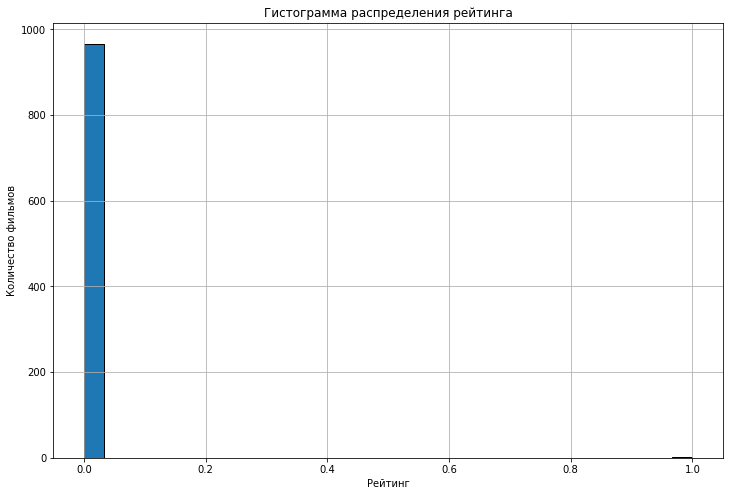

In [87]:
plt.figure(figsize=(12,8))
df['ratings'].hist(bins=30,range = (0,1), ec='black')
plt.title('Гистограмма распределения рейтинга')
plt.ylabel('Количество фильмов')
plt.xlabel('Рейтинг')
plt.show()

In [88]:
df.query('ratings<1')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов","А.Столпер, Б.Иванов",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение, Студия ""Три брата"" агентс...",Чехия,Владимир Дрга,Неизвестно,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Б.Барнет,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,Не указан,219569.0,NaN
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер","США, Канада",Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,Не указан,NaN,NaN


Выделяются наши пропуски, которые мы заменили на 0.

Взглянем на интервал с 8 до 10.

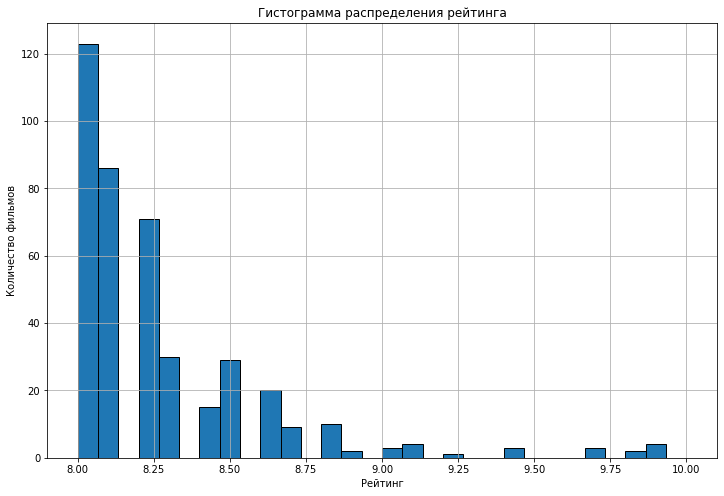

In [89]:
plt.figure(figsize=(12,8))
df['ratings'].hist(bins=30,range = (8,10), ec='black')
plt.title('Гистограмма распределения рейтинга')
plt.ylabel('Количество фильмов')
plt.xlabel('Рейтинг')
plt.show()

Выведем значения с рейтингом больше 9.

In [90]:
df.query('ratings>9')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...","Аргентина, Бразилия",Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.9,"ужасы, триллер, драма",NaN,NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.7,"ужасы, фантастика, фэнтези",NaN,NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9.9,"триллер, драма, детектив",NaN,NaN
1471,Друзья друзей,111014513,2013-12-19 12:00:00+00:00,Художественный,"ООО ""ЕМ Продакшн""",Россия,А.Аксененко,"Г.Малков, В.Поляков, Г.Андреасян, С.Андреасян",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.2,"комедия, мелодрама",27780.00,NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.9,"аниме, мультфильм, ужасы",4295.00,NaN
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.1,"драма, семейный",0.00,NaN
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,9.4,"фантастика, боевик, комедия",334750.00,0.25
3514,Чужой дом,111015516,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Лига Продакшн""","Россия, Грузия, Хорватия, Испания",Р.Глурджидзе,"З.Магалашвили, К.Гечмен-Вальдек, Н.Горшкова",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.1,драма,NaN,NaN
3585,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00+00:00,Анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия, Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,9.7,"мультфильм, ужасы, фэнтези",NaN,NaN
3948,Круиз.,211038210,2010-09-03 12:00:00+00:00,Художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.7,"приключения, комедия, фэнтези",NaN,NaN


Посмотрим на значения с рейтингом больше 9.2.

In [91]:
df.query('ratings > 9.2')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...","Аргентина, Бразилия",Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.9,"ужасы, триллер, драма",NaN,NaN
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.7,"ужасы, фантастика, фэнтези",NaN,NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9.9,"триллер, драма, детектив",NaN,NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.9,"аниме, мультфильм, ужасы",4295.00,NaN
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,9.4,"фантастика, боевик, комедия",334750.00,0.25
3585,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00+00:00,Анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия, Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,9.7,"мультфильм, ужасы, фэнтези",NaN,NaN
3948,Круиз.,211038210,2010-09-03 12:00:00+00:00,Художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.7,"приключения, комедия, фэнтези",NaN,NaN
5821,Свинья,121007018,2018-04-11 12:00:00+00:00,Художественный,"Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм",Иран,Мани Хагиги,Мани Хагиги,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,9.4,"триллер, драма",1587221.51,NaN
5910,Мира,112000118,2018-06-04 12:00:00+00:00,Документальный,"ООО ""Компания ""Новые люди""",Россия,Д.Шабаев,Н.Мокрицкая,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,9.4,драма,NaN,NaN
6616,ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,111026518,2019-01-21 12:00:00+00:00,Художественный,ИП Вайсман Анатолий Александрович,Россия,"А.Сазонов, Е.Климович, А.Коломеец, С.Черникова...","Д.Руюежин, Л.Пятницкая, Д.Колеров, Э.Ким, А.Хомич",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.8,"фантастика, боевик",NaN,NaN


Выглядят подозрительно, загуглив понял, что 9.2 это максимальный рейтинг на кинопоиске и принадлежит фильму Зеленая миля. Удалим значения более 9.2. Их мало и они повлияют на исследование

In [92]:
df.drop(df[df.ratings > 9.2].index, inplace=True)

Проверим.

In [93]:
df.query('ratings > 9.2')

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage


**Вывод:** Отлично аномалии удалили. Следуем дальше.

Проверим колонку refundable_support

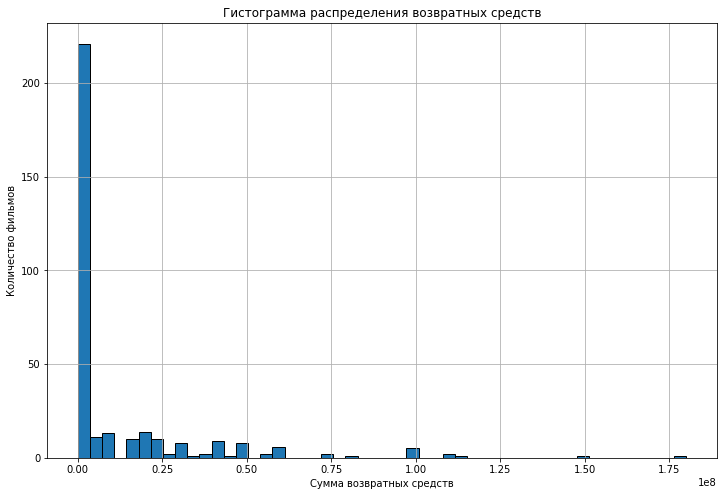

In [94]:
plt.figure(figsize=(12,8))
df['refundable_support'].hist(bins=50, ec='black')
plt.title('Гистограмма распределения возвратных средств')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма возвратных средств')
plt.show()

Посмотрим на статистические данные.

In [95]:
df['refundable_support'].describe()

count    3.310000e+02
mean     1.190030e+07
std      2.494570e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

Посмотрим на знаяения от 100 до 200 млн.

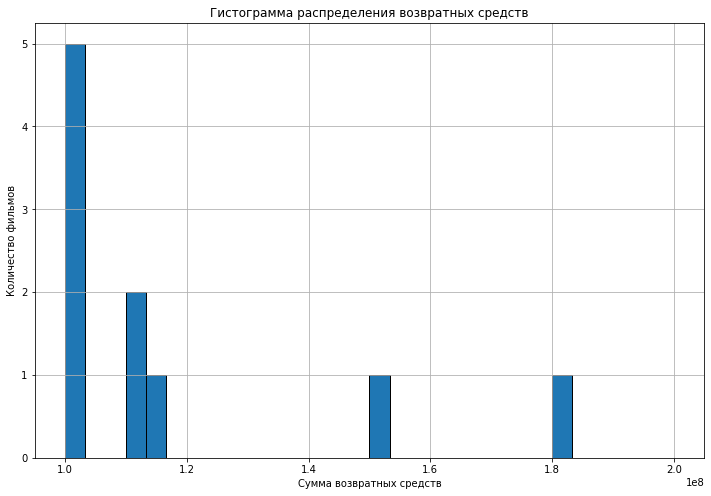

In [96]:
plt.figure(figsize=(12,8))
df['refundable_support'].hist(bins=30,range = (100000000,200000000), ec='black')
plt.title('Гистограмма распределения возвратных средств')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма возвратных средств')
plt.show()

Посмотрим от 0 до 20 млн.

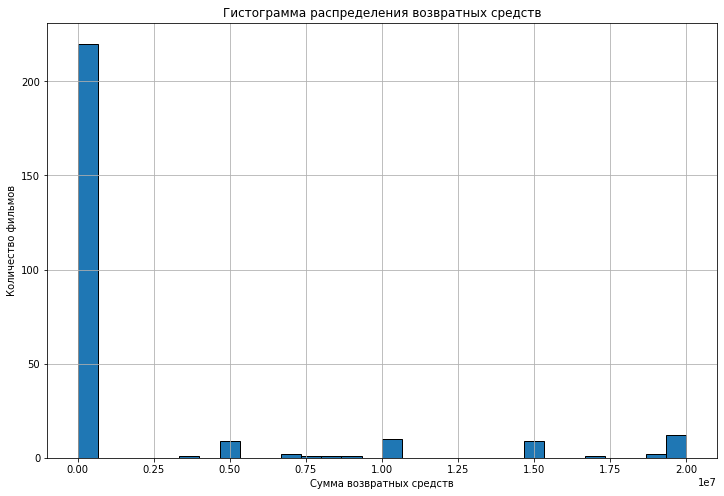

In [97]:
plt.figure(figsize=(12,8))
df['refundable_support'].hist(bins=30,range = (0,20000000), ec='black')
plt.title('Гистограмма распределения возвратных средств')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма возвратных средств')
plt.show()

**Вывод:** Выделяются нулевые значения. Сложно понять аномалии. Сложно попытаться чем-то их заменить. Оставим здесь всё как есть. Просто потом при анализе не будем учитывать недостающие значения.

Проверим колонку nonrefundable_support

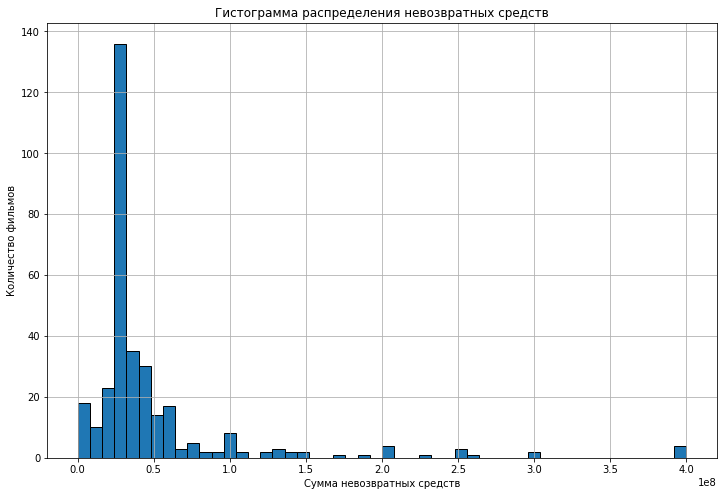

In [98]:
plt.figure(figsize=(12,8))
df['nonrefundable_support'].hist(bins=50, ec='black')
plt.title('Гистограмма распределения невозвратных средств')
plt.ylabel('Количество фильмов')
plt.xlabel('Сумма невозвратных средств')
plt.show()

**Вывод:** По примеру возвратных средств, понять аномалии здесь трудно. Поэтому оставим здесь все как было. При исследовании не будем учитывать те значения в которых нет данных.

**Общий вывод:** Изучив столбцы, которые хранят количественные значения. Мы проверили и обнаружились в таких столбцах подозрительные данные. Какие-то данные мы удалили как с рейтингом, какие-то заменили как с бюджетом, а какие-то оставили как есть, это с возвратными и невозвратными средствами.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [99]:
print('Чаще всего доля участия государственной поддержки от общего бюджета составляет', support_percentage)

Чаще всего доля участия государственной поддержки от общего бюджета составляет 0.6140376284219444


**Вывод:** Доля государственной поддержки от общего бюджета составляет 0.61. Что довольно большая цифра. Это означает, что больше половины снятных фильмов, снимаются на государственные средства. То есть государство, с одной стороны как бы спонсируя такие фильмы, но с другой стороны государство регулирует, что смотреть простым людям. То есть, если ты талантливый режиссер или продюссер, то без поддержки государства у тебя не получится снять любой фильм. Это печально. Выделяются такие огромные средства на съемки фильмов, а снимают реально провальные и никому не нужные картины. Это мы убедимся дальше в исследовании. 

***Грустно за российский кинематограф***

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Создадим новый столбец с информацией о годе проката.

In [100]:
df['year'] = df['date_start'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Создадим два столбца:с именем и фамилией главного режиссёра и основным жанром фильма. Создадим функцию.

In [101]:
def add_main(df, columns):
    for column in columns:
        df[f'main_{column}'] = df[column].dropna().apply(lambda x: x.split(', ')[0])
    return df

Применим функцию к колонкам 'director', 'genres'.

In [102]:
df = add_main(df, ['director', 'genres'])

Проверим результат добавления новых столбцов.

In [103]:
df.head()

,name,license,date_start,type,film_studio,country,director,producer,age,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик, драма, мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма, военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Создадим сводную таблицу, где будем учитывать только указанную информацию.

In [104]:
df_pivot = df.loc[df['box_office'].notna(), ['year', 'box_office']] \
                .groupby('year') \
                .agg(['count', 'sum', 'mean', 'median'])

df_pivot.columns = df_pivot.columns.get_level_values(1)

Построим график по количеству фильмов в прокате по годам.

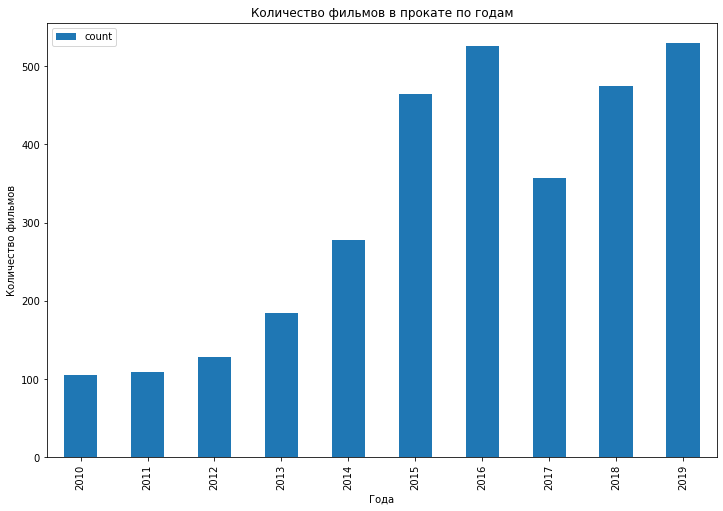

In [105]:
df_pivot.plot(title='Количество фильмов в прокате по годам',
              kind='bar',
              y='count',
              figsize=(12, 8))
plt.ylabel('Количество фильмов')
plt.xlabel('Года');

Выведем информацию по количеству фильмов, общей суммой сборов, средним и медианным значениями в зависимости от года в одну таблицу.

In [106]:
(
    df
     .query('year > 2009')
     .groupby(['year'])['box_office']
     .agg(['count', 'sum', 'mean', 'median'])
     .style.format("{:,.0f}")
)

,count,sum,mean,median
year,,,,
2010,105,"2,428,654","23,130","1,700"
2011,109,"14,102,765","129,383","3,000"
2012,128,"6,955,423","54,339","5,660"
2013,184,"29,799,706","161,955","3,522"
2014,278,"7,444,947,564","26,780,387","18,885"
2015,464,"39,497,030,446","85,122,910","4,946,745"
2016,526,"47,866,299,742","91,000,570","3,846,679"
2017,357,"48,563,707,218","136,032,793","9,968,340"
2018,474,"49,666,815,913","104,782,312","8,911,534"


**Наблюдения:** Первые три места по количеству фильмов, вышедших в прокат в год стали такие года как 2019 - это 530 фильмов, 2016 - это 526 и 2018 - это 475 фильмов соответсвенно. 2017 год почему то выпал из общей картины в этом году выпустили в прокат всего лишь 357 фильмов. Видно, что до 2014 года сфера кинотеатров не была популярна, так как до 2014 года выпускали в прокат чуть больше ста фильмов каждый год. И начиная с 2014 года люди, стали чаще ходить в кино и соответсвенно прокатчики, выпускали больше фильмов в прокат.

In [107]:
print(f'Доля фильмов с указанной информацией о прокате в кинотеатрах составляет: {df.box_office.notna().mean():.2f}')

Доля фильмов с указанной информацией о прокате в кинотеатрах составляет: 0.42


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Построим график по количеству сборов фильмов по годам.

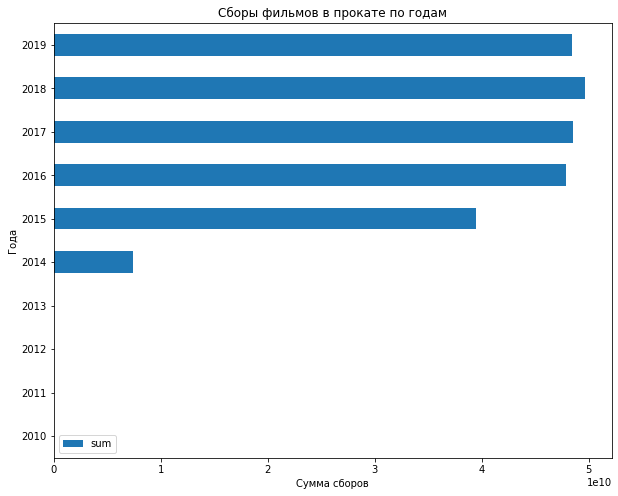

In [108]:
df_pivot.plot(title='Cборы фильмов в прокате по годам', 
              kind='barh', 
              y='sum',
              figsize=(10, 8))
plt.xlabel('Сумма сборов')
plt.ylabel('Года');

In [109]:
print(f"В {df_pivot['sum'].idxmin()} году сумма сборов была минимальной, в {df_pivot['sum'].idxmax()} максимальной.")

В 2010 году сумма сборов была минимальной, в 2018 максимальной.


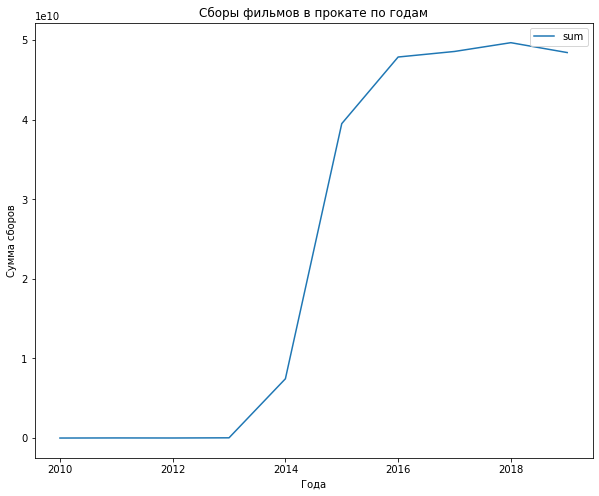

In [110]:
df_pivot.plot(title='Cборы фильмов в прокате по годам', 
              kind='line', 
              y='sum',
              figsize=(10, 8))
plt.ylabel('Сумма сборов')
plt.xlabel('Года');

**Наблюдения:** По графикам видно, что в 2010 году сумма сборов была минимальной и составляла 2,428,654. До 2014 года ситуация со сборами фильмов выглядела плачевной, после 2014 года сборы фильмов начали расти хорошими темпами и уже в 2018 году сумма сборов составила максимальное значение 49,668,403,134. Почти 50 миллиардов это действительно огромная сумма. Снижение суммы сборов в 2019 году обусловлено скорее всего пандемией вместе с COVID 2019. **Интересно было бы посмотреть статистики после 2019 года...**

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Построим график зависимости средней и медианной суммы сборов по годам.

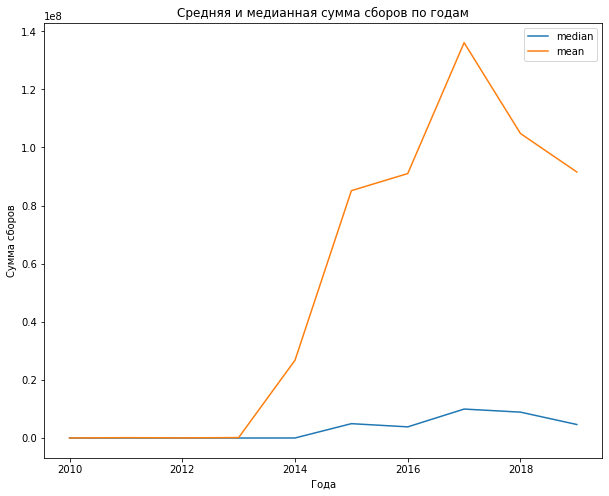

In [111]:
df_pivot.plot(title='Cредняя и медианная сумма сборов по годам', 
              kind='line', 
              y=['median', 'mean'],
             figsize=(10, 8))
plt.ylabel('Сумма сборов')
plt.xlabel('Года');

Выведем среднее и медианное значение в зависимости от года в одну таблицу.

In [112]:
(
    df
     .query('year > 2009')
     .groupby(['year'])['box_office']
     .agg(['mean', 'median'])
     .style.format("{:,.0f}")
     
)

,mean,median
year,,
2010,"23,130","1,700"
2011,"129,383","3,000"
2012,"54,339","5,660"
2013,"161,955","3,522"
2014,"26,780,387","18,885"
2015,"85,122,910","4,946,745"
2016,"91,000,570","3,846,679"
2017,"136,032,793","9,968,340"
2018,"104,782,312","8,911,534"


**Наблюдения:** Максимальное медианное значение суммы сборов приходится на 2017 год прям самый пик. После 2017 идет снижение медианного значения. Что касается среднего значения, виден небольшой рост после 2014 года и заметно падение после 2018 года.
Различия между средним значением и медианой есть и такая разница скорее всего связана с тем, что большинство данных отсуствует. Мы опираемся только на указанную информацию, доля которой от 0.42 общего числа. И исходя из того, что медиана показывает центарльное значение в выборке.

**Среднее значение и медиана** - это две разные меры центральной тенденции, используемые в статистике для описания распределения данных. 
**Среднее значение** - это сумма всех значений, разделенная на количество значений в выборке, тогда как **медиана** - это значение, которое находится посередине упорядоченной выборки, когда все значения упорядочены по возрастанию или убыванию.

Когда речь идет о кассовых сборах в кинематографе, среднее значение кассовых сборов представляет общую сумму всех кассовых сборов, разделенную на количество фильмов в выборке. 

Эта мера даёт общее представление о среднем уровне дохода на фильм, но может быть сильно искажена выбросами, такими как очень успешный или неудачный фильм.Медиана кассовых сборов, с другой стороны, представляет собой значение, которое разделяет набор кассовых сборов на две равные части. 

Эта мера центральной тенденции показывает центральную точку распределения кассовых сборов и не будет сильно искажена экстремальными значениями.

Таким образом, основное различие между средним значением и медианой кассовых сборов заключается в том, что первое даёт общее представление о среднем уровне дохода на фильм, в то время как второе показывает центральную точку распределения и не будет сильно искажено экстремальными значениями.

Если вкратце: это из-за 2х вещей 
- Роста количества фильмов
- Большая разница в сборах, включая фильмы, которые выстрелили.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Построим график распределения суммы сборов в зависимости от года для разных возрастных ограничений. Для наглядности сведем всё в один график.

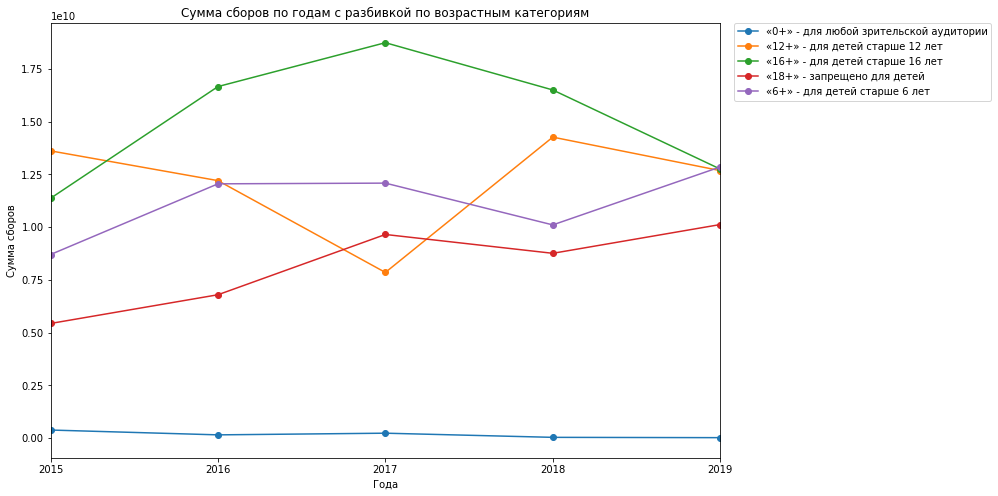

In [113]:
df[df['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age',
                values='box_office',
                aggfunc='sum') \
    .plot(title='Сумма сборов по годам с разбивкой по возрастным категориям',
          kind='line',
          style='o-',
         figsize=(12, 8))
plt.xlim (2015, 2019)
plt.xticks(np.arange(2015, 2020, step=1.0))
plt.ylabel('Сумма сборов')
plt.xlabel('Года')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 );

**Наблюдения:**  Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) влияет на сборы фильма в прокате в период с 2015 по 2019 год. Ограничение «16+» самая прибыльная категория фильмов. Категория «18+» набирает обороты по сумме сборов с каждым годом, скорее всего потому, что потенциальный зритель растет и ему хочется смотреть в кинотетаре что-то интересное подстать возрасту. Категория «12+» в 2017 году привела к минимальной сумме сборов, исходя из того, что в 2017 году выходило в прокат и так малое количество фильмов. Категория «6+» набирает популярность и сумма сборов растет начиная с 2018 года.

Фильмы с возрастным ограничением «16+» собрали больше всего денег в прокате в 2017 году и уже в 2019 году сравнялись с категориями «18+» и «12+». 

Конечно общая картина меняется в зависимости от года, это связано с тем, что с каждым годом в прокат выпускается большое количество фильмов с самыми разнообразными жанрами. Зритель с годами растет, меняется категория, меняются интересы.

Взглянем на фильмы с самым большим бюджетом.

In [114]:
df.groupby(['name', 'box_office','budget']).agg('sum').sort_values(by='budget', ascending=False).head(10)

,,,license,refundable_support,nonrefundable_support,ratings,support_percentage,year
name,box_office,budget,,,,,,
Тайна Печати Дракона,3.335971e+08,2.305074e+09,111012819,180000000.0,90000000.0,5.8,0.117133,2019
Матильда,5.117755e+08,1.032906e+09,111005717,110000000.0,190000000.0,7.7,0.290443,2017
Союз спасения,7.177032e+08,9.800000e+08,111022019,100000000.0,400000000.0,6.0,0.510204,2019
Грех,5.424320e+07,7.799420e+08,111014419,0.0,60000000.0,6.9,0.076929,2019
Дуэлянт,3.642851e+08,6.842005e+08,111015416,150000000.0,300000000.0,6.6,0.657702,2016
Экипаж .,1.402255e+09,6.352839e+08,111005416,50000000.0,392104482.0,7.6,0.695916,2016
Движение вверх,2.779686e+09,5.901922e+08,111011817,0.0,400000000.0,7.5,0.677745,2017
Т-34,2.271754e+09,5.637847e+08,111024918,60000000.0,120000000.0,6.5,0.319271,2018
Время первых (2017),5.443323e+08,5.284420e+08,111001317,75000000.0,175000000.0,7.5,0.473089,2017


Топ-10 фильмов по сумме бюджета. Возглавляет картина Тайна Печати Дракона с бюджетом 2,3 млрд. На втором месте картина Матильда с бюджетом 1,03 млрд. Замыкает тройку картина Союз спасения с бюджетом 980 млн.

Взглянем на фильмы с самой большой суммой сборов. 

In [115]:
df.groupby(['name','box_office', 'budget']).agg('sum').sort_values(by='box_office', ascending=False).head(10)

,,,license,refundable_support,nonrefundable_support,ratings,support_percentage,year
name,box_office,budget,,,,,,
Холоп,3.073569e+09,1.600000e+08,111021719,25000000.0,35000000.0,6.8,0.375000,2019
Движение вверх,2.779686e+09,5.901922e+08,111011817,0.0,400000000.0,7.5,0.677745,2017
Т-34,2.271754e+09,5.637847e+08,111024918,60000000.0,120000000.0,6.5,0.319271,2018
Последний богатырь,1.655038e+09,3.524776e+08,111007017,50000000.0,50000000.0,6.8,0.283706,2017
Лёд,1.445732e+09,1.485852e+08,111000518,25000000.0,60000000.0,0.0,0.572062,2018
Экипаж .,1.402255e+09,6.352839e+08,111005416,50000000.0,392104482.0,7.6,0.695916,2016
Притяжение (2016),1.038321e+09,4.071412e+08,111018116,0.0,250000000.0,5.6,inf,2016
Ёлки Новые,8.554511e+08,1.743819e+08,111011617,50000000.0,50000000.0,5.8,0.573454,2017
Тренер,8.205280e+08,3.901911e+08,111003218,0.0,260000000.0,6.8,0.666340,2018


**Вывод:** Топ-10 фильмов по сумме сборов. Возглавляет картина Холоп с максимальной суммой сбора более 3 млрд. при бюджете 160 млн. На втором месте картина Движение вверх с суммой сбора более 2,73 млрд. при бюджете 590 млн. И замыкает тройку картина Т-34 с суммой сбора 2,27 млрд. при бюджете 563 млн.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Cоздадим датасет, включающий в себя только фильмы, с господдержкой.

In [116]:
df_supported = df[df['refundable_support'].notna() | df['nonrefundable_support'].notna()]

Создадим колонку с полной поддержкой.

In [117]:
df_supported['full_support'] = df_supported['nonrefundable_support'] + df_supported['refundable_support']

Созадим колонку рентабельность.

In [118]:
df_supported['profitability'] = df_supported['box_office'] / df_supported['full_support'] -1

In [119]:
df_supported['profitability'].head(10)

1281   -0.986213
1448   -0.998918
1498   -0.814952
1524   -0.998003
1792   -0.990716
1854   -0.396846
1870    0.661112
1871   -0.898258
1903    3.704058
1912   -0.998473
Name: profitability, dtype: float64

Создадим колонку с фильмами, которые окупились.

In [120]:
df_supported['is_paid_off'] = df_supported['profitability'] > 0

Создадим колонку с фильмами, которые не окупились.

In [121]:
df_supported['is_not_paid_off'] = ~df_supported['is_paid_off']

Исследуем фильмы с господдержкой по средней оценке рейтинга и по жанру фильмов.

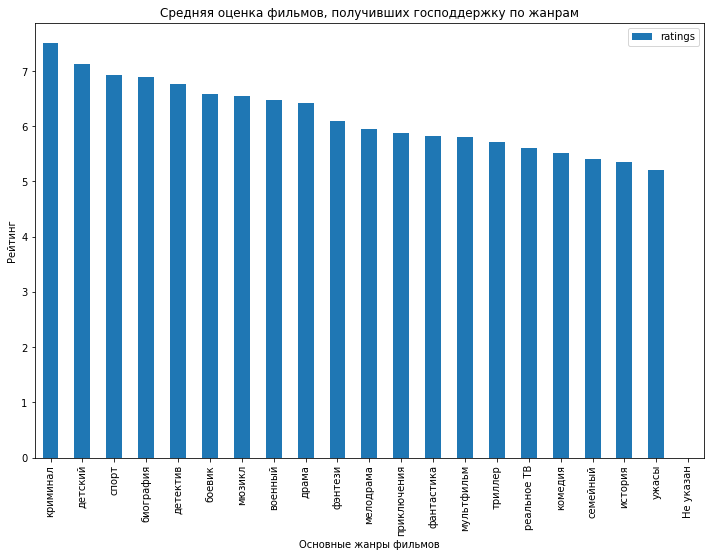

In [122]:
df_supported[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='Средняя оценка фильмов, получивших господдержку по жанрам', 
                                         kind='bar',
                                        figsize=(12, 8))
plt.ylabel('Рейтинг')
plt.xlabel('Основные жанры фильмов');

**Наблюдения:** Как мы видим, что топ-3 по среднему рейтингу состаляют фильмы в жанре криминал, детские и спорт соответсвенно. Замыкает тройка фильмов в жанре семейный, история и ужасы соответственно. Плотную середину занимают такие жанры как драма, фантастика, фэнтези и мелодрама.

**Исследуем фильмы с господдержкой по количеству снятых фильмов и по жанру фильмов.**

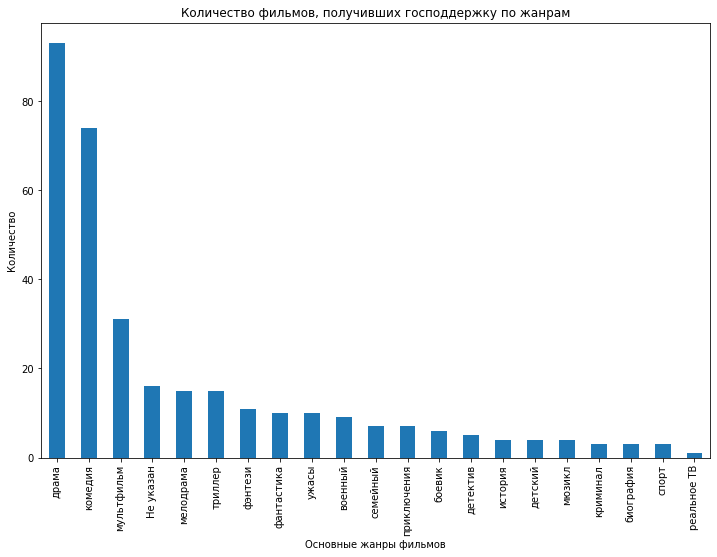

In [123]:
df_supported['main_genres'].value_counts().plot(title='Количество фильмов, получивших господдержку по жанрам',
                            kind='bar',
                            figsize=(12, 8))
plt.ylabel('Количество')
plt.xlabel('Основные жанры фильмов');

**Наблюдения:** Топ-3 по количеству фильмов, получивших господдержку составляют такие жанры как драма, комедия и мультфильмы. На последних метсах по количеству оказались жанры как биография, спорт и реальное ТВ. Средние значения показали такие жанры, как ужасы, военный, семейный и приключения.

**Исследуем фильмы с господдержкой по количеству окупившихся и не окупившихся фильмов и по жанру фильмов.**

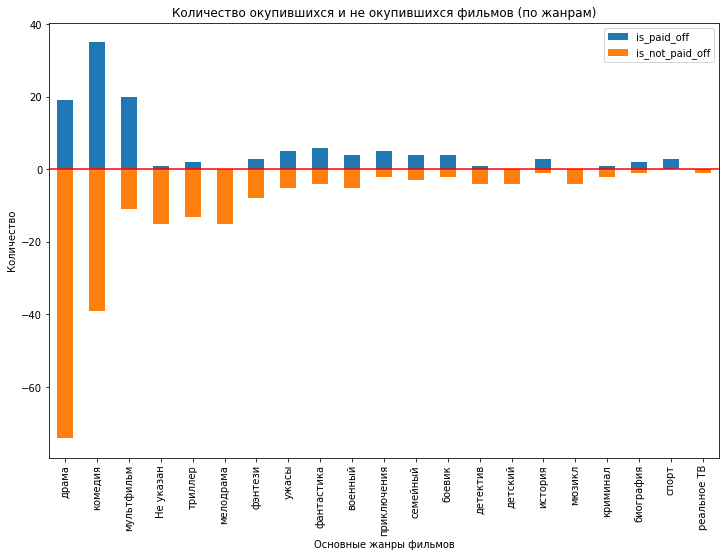

In [124]:
df_supported.groupby('main_genres') \
            .agg({'name': 'count',
                  'is_paid_off': 'sum',
                  'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='name',
                         ascending=False) \
            .plot(title='Количество окупившихся и не окупившихся фильмов (по жанрам)',
                  kind='bar',
                  stacked=True,
                  y=['is_paid_off', 'is_not_paid_off'],
                 figsize=(12, 8))
plt.ylabel('Количество')
plt.xlabel('Основные жанры фильмов')
plt.axhline (y=0, color = 'red');

**Наблюдения:** Как мы можем видеть абсолютное большинство не окупившихся фильмов составляют фильмы в жанре драма и комедия. Фильмов с таким жанром больше всего приходится на господдержку, хотя они проваливаются в прокате. А вот мультфильмы наоборот число окупившихся больше, чем не окупившихся. Это означает что мультфильмы инетересны публике. Фильмы в жанре триллер, мелодрама и фантастика лидирут по неокупаемости от общего числа. Это означает, что затрты на такие фильмы коллосальные, а выхлопа нет. Остальные жанры фильмов держатся на одинаковом уровне по окупаемости. 50 процентов окупается, 50 нет.

**Исследуем фильмы с господдержкой по объему государственной поддержки и по жанру фильмов.**

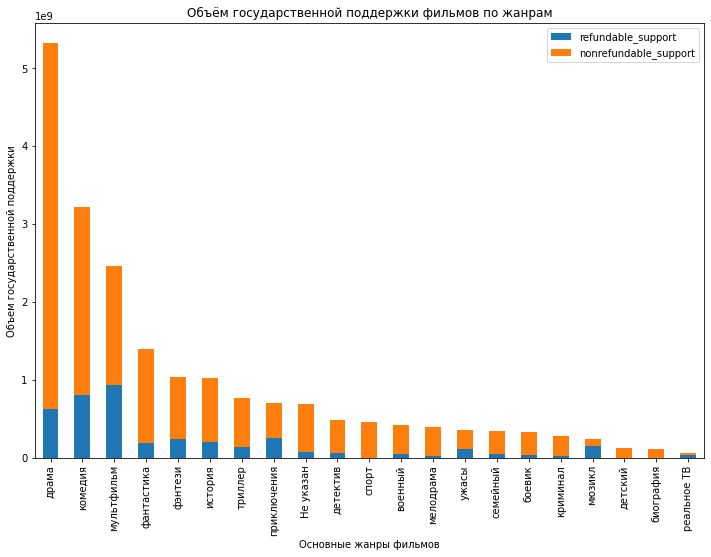

In [125]:
df_supported.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Объём государственной поддержки фильмов по жанрам',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'],
                 figsize=(12, 8))
plt.ylabel('Объем государственной поддержки')
plt.xlabel('Основные жанры фильмов');

**Наблюдения:** Топ-3 жанров фильмов по объему государственной поддержке составляют такие жанры как драма, комедия и мультфильмы. Что примечательно, большая часть государственной поддержки составляют невозвратные средства. То есть в не зависимости от того, выстрелит фильм, большая часть бюджета не будет возвращена. Занимательно, что такие жанры как спорт, биография и детский полностю состоят из невозвратных средств. У остальных жанров такая же ситуация, что большую часть составляют невозвратные средства, только при малом количестве таких фильмов.

**Исследуем фильмы с господдержкой по общей рентабельности и по жанру фильмов.**

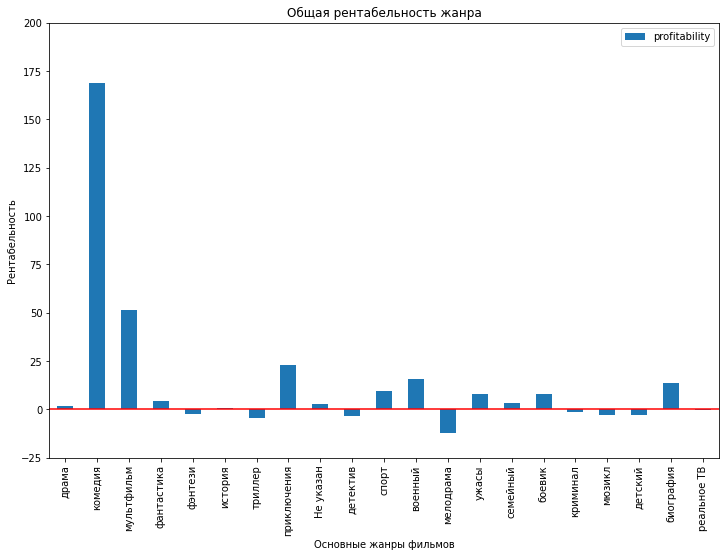

In [126]:
df_supported.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Общая рентабельность жанра',
                  kind='bar',
                  stacked=True,
                  y='profitability',
                 figsize=(12, 8))
plt.ylim (-25, 200)
plt.ylabel('Рентабельность')
plt.xlabel('Основные жанры фильмов')
plt.axhline (y=0, color = 'red');

**Наблюдения:** Наилучшие показатели по общей рентабельности фильмов с государственной поддержкой составляют такие жанры как комедия, мультфильмы и приключения. Самый плохой показатель в этой категории у жанра мелодрама, триллер и детектив. Нулевая рентабельность получилась у жанров история и реальное ТВ.

**Исследуем фильмы с господдержкой по средней рентабельности и по жанру фильмов.**

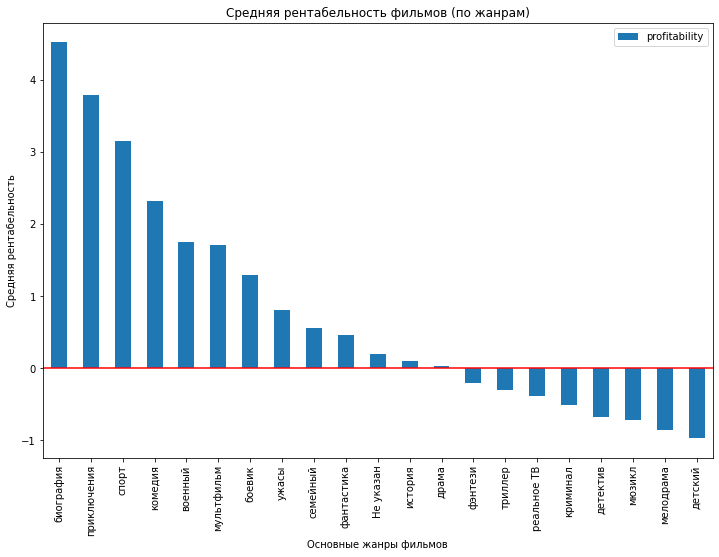

In [127]:
df_supported.groupby('main_genres') \
            .agg('mean') \
            .sort_values(by='profitability',
                         ascending=False) \
            .plot(title='Средняя рентабельность фильмов (по жанрам)',
                  kind='bar',
                  stacked=True,
                  y='profitability',
                 figsize=(12, 8))
plt.ylabel('Средняя рентабельность')
plt.xlabel('Основные жанры фильмов')
plt.axhline (y=0, color = 'red');

**Наблюдения:** Топ-3 жанров фильмов с государственной поддержкой по средней рентабельности составляют такие жанры как биография, приключения и спорт. На последних местах расположились мюзикл, мелодрама и детский. Почти нулевая средняя рентабельность у жанра драма.

**Исследуем фильмы с господдержкой по количеству сборов в год.**

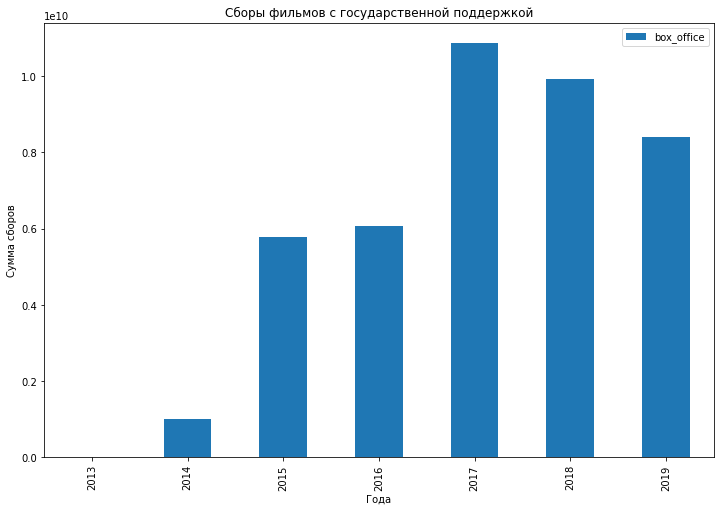

In [128]:
df_supported.groupby('year') \
            .agg('sum') \
            .plot(title='Cборы фильмов с государственной поддержкой',
                  kind='bar',
                  y='box_office',
                 figsize=(12, 8))
plt.ylabel('Сумма сборов')
plt.xlabel('Года');

**Наблюдения:** С каждым годом количество сборов фильмов с государственной поддержкой растет, что логично потому с каждым годом количество фильмов, которые поддерживает государство растет. Что примечательно самое максимальное количество сборов по фильмам с госудраственной поддержкой было в 2017 году. Следом идет 2018 и замыкает 2019. Это подталкивает на мысль, что в полседние годы фильмы, на которые выделются бюджетные средства не окупают себя и приносят мало прибыли. А всё из-за того, что российские фильммейкеры не умеют снимать хорошее кино.

**Исследуем фильмы с господдержкой по количеству сборов в год.**

Создадим сводную таблицу.

In [129]:
df_supported_pivot = df_supported.loc[df_supported['box_office'].notna(), ['year', 'box_office']] \
                .groupby('year') \
                .agg(['count', 'sum', 'mean', 'median'])

df_supported_pivot.columns = df_supported_pivot.columns.get_level_values(1)

Построим график по количеству фильмов с господдержкой по годам.

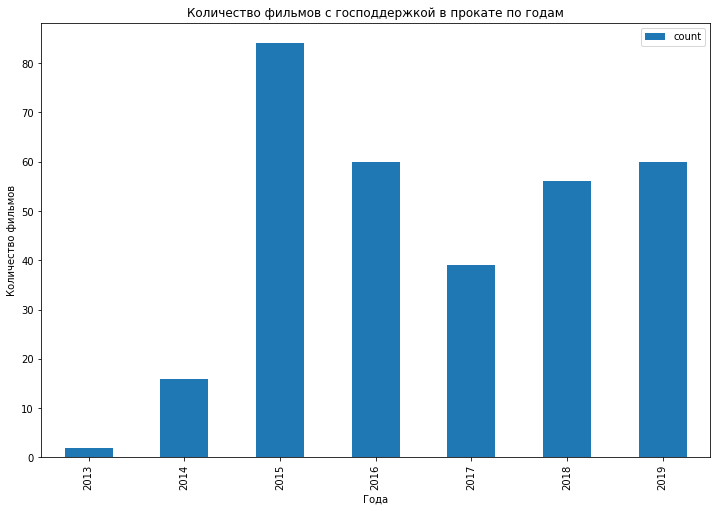

In [130]:
df_supported_pivot.plot(title='Количество фильмов c господдержкой в прокате по годам',
              kind='bar',
              y='count',
              figsize=(12, 8))
plt.ylabel('Количество фильмов')
plt.xlabel('Года');

**Наблюдения:** Что удивительное из этого графика, что в 2017 году было снято относительно мало фильмов с государственной поддержкой, но при этом судя по сборам за 2017 год эти фильмы принесли больше денег, чем другие. Самое большое количество фильмов, снятых при помощи государства был в 2015 году. Следом делят между собой второе место 2016 и 2019 года. А в 2013 и в 2014 годах, режиссеры даже наверное не знали, что можно просить денег на съемки фильмов у государства.

### Шаг 5. Напишите общий вывод

В этом проекте мы:
- изучили данные, опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 
- Изучили рынок российского кинопроката и выявили текущие тренды.

Количество вышедших в прокат фильмов в 2019 году составило 529 фильмов оно выросло по отношению к предыдущим годам.
По количеству сборов лидирует 2018 год и составляет 49,666,815,913.

- 2010	Количество фильмов 105	Сумма сборов 2,428,654	
- 2011	Количество фильмов 109	Сумма сборов 14,102,765	
- 2012	Количество фильмов 128	Сумма сборов 6,955,423	
- 2013	Количество фильмов 184	Сумма сборов 29,799,706		
- 2014	Количество фильмов 278	Сумма сборов 7,444,947,564		
- 2015	Количество фильмов 464	Сумма сборов 39,497,030,446		
- 2016	Количество фильмов 526	Сумма сборов 47,866,299,742		
- 2017	Количество фильмов 357	Сумма сборов 48,563,707,218		
- 2018	Количество фильмов 474	Сумма сборов 49,666,815,913	
- 2019	Количество фильмов 529	Сумма сборов 48,425,673,788	

Количество фильмов растет начиная с 2014 года и уже начиная с 2019 года по прогнозам количество фильмов идущих в прокате будет уменьшаться. **(на это очень сильно повлияют санкции, запреты на показы зарубежных фильмов, панедмия большую роль тоже сыграла)**

Ограничение «16+» самая прибыльная категория фильмов. 

Совокупные кассовые сборы кинопроката в России в 2019 году достигли 48,4 млрд рублей, чего не было никогда.
В сравнении с 2014 годом объём кассовых сборов в 2019-м вырос в 7 раз. 

Показатели отечественного кино хоть и уступили рекордным значениям 2018 года (49,6 млрд рублей), тем не менее внесли значимый вклад в развитие российского рынка кинопроката.

Самые высокие средние рейтинги фильмов с государственной поддержкой это фильмы в жанре криминал, детские и спорт.

Рейтинг по количеству фильмов, получивших господдержку возглавляют такие жанры как драма, комедия и мультфильмы.

Абсолютное большинство не окупившихся фильмов с государственной поддержкой составляют фильмы в жанре драма и комедия.

По объему государственной поддержки рейтинг возглавляют такие жанры фильмов как драма, комедия и мультфильмы.

По общей рентабельности фильмов с государственной поддержкой на первых местах такие жанры фильмов как комедия, мультфильмы и приключения.

Топ-3 фильмов по сумме бюджета возглавляет картина Тайна Печати Дракона с бюджетом 2,3 млрд. На втором месте картина Матильда с бюджетом 1,03 млрд. Замыкает тройку картина Союз спасения с бюджетом 980 млн.

Топ-3 фильмов по кассовым сборам возглавляет картина Холоп с максимальной суммой сбора более 3 млрд. при бюджете 160 млн. На втором месте картина Движение вверх с суммой сбора более 2,73 млрд. при бюджете 590 млн. И замыкает тройку картина Т-34 с суммой сбора 2,27 млрд. при бюджете 563 млн.

Кинематографический рынок зависим от государственной поддержки, которая для большинства кинематографистов является единственным шансом снять фильм.

За период поддержки кинопроектов начиная с 2010 года большинство проектов оказались провальными и убыточными.
Реальным направлением развития и роста эффективности кинопроизводства и проката фильмов является увеличение совместных проектов с зарубежными кинокомпаниями-партнерами **(но в связи с реалиями ухода с рынка зарубежных представителей - это не возможно)**
Кинорынок в России высококончетрированный, что является следствием политики государства в части финансовой поддержки в киноиндустрии. Все крупныее игроки в отрасли кино обеспечивают свои производственные силы ориентируясь на финансовую поддержку Фонда кино и Министерства культуры РФ.

В условиях коронавирусной пандемии закрываются кинотеатры, останавливаются съемки, переносятся премьеры все это сказывается на кассовых сборах и рейтингах фильмов.

Мне кажется с развитием стриминговых сервисов и онлайн-кинотеатров, такое понятие как сходить на премьеру фильма в кинотеатр исчезнет со временем. Потому, что лень - двигатель прогресса. И если предложить посмотреть премеьру очередного фильма дома лёжа на диване или сходить в кинотеатр, то я думаю многие выберут первый вариант.